('Model Accuracy : ', 0.7297297297297297)
Blood Pressure is:175
Cholestrol is:33
Family History is:1
BMI is:44
Patient age is:99
Negative: Does not have a heart disease
**Blood Pressure of people with heart disease**
('Mean BP:', 143.7375)
('Median BP:', 138.0)
**Blood Pressure of people no with heart disease**
('Mean:', 135.46026490066225)
('Median:', 132.0)


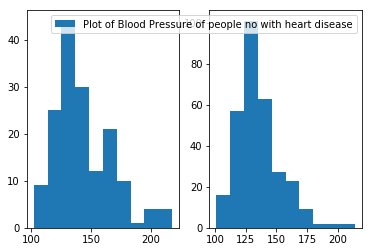

**Ages of people with heart disease**
('Mean BP:', 50.29375)
('Median BP:', 53.0)
**Ages of people no with heart disease**
('Mean:', 38.854304635761586)
('Median:', 40.0)


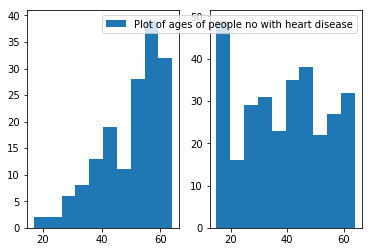

**Cholestrol levels of people with heart disease**
('Mean:', 5.4879375)
('Median:', 5.0649999999999995)
**Cholestrol levels of people with no heart disease**
('Mean:', 4.344238410596026)
('Median:', 3.98)


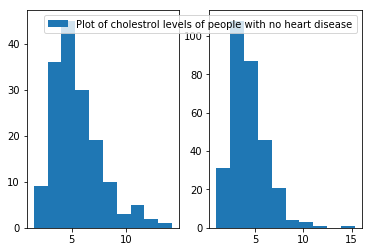

**BMI of people with heart disease**
('Mean:', 26.6229375)
('Median:', 26.475)
**BMI of people with no heart disease**
('Mean:', 25.737450331125828)
('Median:', 25.57)


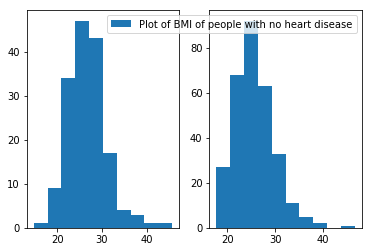

In [5]:

# coding: utf-8

# In[160]:


import pandas as pd
import numpy as np
from statistics import mean,median,mode
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
train = pd.read_csv('HeartDisease_Training Data.csv')
test = pd.read_csv('HeartDisease_Testing Data.csv')

import cgitb
import cgi
#import MySQLdb
import Tkinter
import tkMessageBox
import Tkinter as tk  
#from Tkinter import ttk  
win = tk.Tk()  
win.minsize(width = 350, height = 200)
win.maxsize(width = 350, height = 200)
win.title("Heart Diease Prediction")  



bp1 = 0
Cholestrol1 = 0
fh1 = 0
bmi1 = 0
age1 = 0
cp1 = 0

#db = MySQLdb.connect(host="localhost",user="root",passwd="",db="heart")
#cur = db.cursor()

# In[161]:


target = train['Class']
data = train.drop(['Class'],axis=1)


# In[162]:


clf = DecisionTreeClassifier()
clf = clf.fit(data,target)


# In[163]:


prediction = clf.predict(test.drop(['uclass'],axis = 1))
true = [0 if i == 'Patient doesnt have a heart disease' else 1 for i in np.array(test['uclass'])]
print("Model Accuracy : ",accuracy_score(true, prediction))




bp = tk.Label(win, text = "Enter the Blood Pressure:").grid(row = 0)

cholestrol = tk.Label(win, text = "Enter the Cholestrol:\n").grid(row = 1)

fh = tk.Label(win, text = "Enter Family History(0/1):\n").grid(row = 2)

bmi = tk.Label(win, text = "Enter the BMI:\n").grid(row = 3)

age = tk.Label(win, text = "Enter the Age:\n").grid(row = 4)

#cp = tk.Label(win, text = "Enter Chest Pain Type:\n").grid(row = 5)

bp = tk.StringVar()  
cholestrol = tk.StringVar()
fh = tk.StringVar()
bmi = tk.StringVar()
age = tk.StringVar()
#cp = tk.StringVar()


def click(): 
	
	print("Blood Pressure is:" + bp.get())	
	bp1 = bp.get()
	print("Cholestrol is:" + cholestrol.get())	
	cholestrol1 = cholestrol.get()
	print("Family History is:" + fh.get())    
	print("BMI is:" + bmi.get())	
	bmi1 = bmi.get()
	print("Patient age is:" + age.get())
    #print("Chest Pain:" + cp.get())	
	age1 = age.get()
	fh1 = fh.get()	    	
    #cp1 = cp.get()	
	
	prediction = clf.predict(np.array([bp1,cholestrol1,fh1,bmi1,age1]).reshape(1,-1))
	if prediction[0] == 0:
		tkMessageBox.showinfo("Prediction", "Negative: Does not have a heart disease")
	else:
		tkMessageBox.showinfo("Prediction", "Positive: Probably Has a heart disease")
	print("Negative: Does not have a heart disease" if prediction[0] == 0 else "Positive: Probably Has a heart disease")


	export_graphviz(clf,out_file='tree.dot')#exports a Decision tree figure
	pos = train[train['Class'] == 1].drop(['Class'],axis = 1)#people with a heart disease
	neg = train[train['Class'] == 0].drop(['Class'],axis = 1)#people without a heart disease



	fig, axs = plt.subplots(1, 2)
	axs[0].hist(pos['Systolic Blood Pressure'],label="Plot of Blood Pressure of people with heart disease")
	axs[1].hist(neg['Systolic Blood Pressure'],label="Plot of Blood Pressure of people no with heart disease")
	plt.legend()
	print('**Blood Pressure of people with heart disease**')
	print('Mean BP:',mean(pos['Systolic Blood Pressure']))
	#meanbp=mean(pos['Systolic Blood Pressure'])
	print('Median BP:',median(pos['Systolic Blood Pressure']))
	#maxbp=median(pos['Systolic Blood Pressure'])
	print("**Blood Pressure of people no with heart disease**")
	print('Mean:',mean(neg['Systolic Blood Pressure']))
	#meanNegbp=mean(neg['Systolic Blood Pressure'])
	print('Median:',median(neg['Systolic Blood Pressure']))
	#maxNegbp=median(neg['Systolic Blood Pressure'])
	plt.show()
	#cur.execute("insert into details values(%s,%s,%s,%s)",(mean(pos['Systolic Blood Pressure']),median(pos['Systolic Blood Pressure']),mean(neg['Systolic Blood Pressure']),median(neg['Systolic Blood Pressure'])))

	fig, axs = plt.subplots(1, 2)
	axs[0].hist(pos['Age'],label="Plot of ages of people with heart disease")
	axs[1].hist(neg['Age'],label="Plot of ages of people no with heart disease")
	plt.legend()
	print('**Ages of people with heart disease**')
	print('Mean BP:',mean(pos['Age']))
	print('Median BP:',median(pos['Age']))
	print("**Ages of people no with heart disease**")
	print('Mean:',mean(neg['Age']))
	print('Median:',median(neg['Age']))
	plt.show()

	fig, axs = plt.subplots(1, 2)
	axs[0].hist(pos['Cholestrol'],label="Plot of cholestrol levels of people with heart disease")
	axs[1].hist(neg['Cholestrol'],label="Plot of cholestrol levels of people with no heart disease")
	print("**Cholestrol levels of people with heart disease**")
	print('Mean:',mean(pos['Cholestrol']))#cholestrol levels above 5.5 could be a sign of a heart disease
	print('Median:',median(pos['Cholestrol']))
	print("**Cholestrol levels of people with no heart disease**")
	print('Mean:',mean(neg['Cholestrol']))
	print('Median:',median(neg['Cholestrol']))
	plt.legend()
	plt.show()

	fig, axs = plt.subplots(1, 2)
	axs[0].hist(pos['BMI'],label="Plot of BMI of people with heart disease")
	axs[1].hist(neg['BMI'],label="Plot of BMI of people with no heart disease")
	print("**BMI of people with heart disease**")
	print('Mean:',mean(pos['BMI']))#BMI above 26.5 could be dangerous
	print('Median:',median(pos['BMI']))
	print("**BMI of people with no heart disease**")
	print('Mean:',mean(neg['BMI']))
	print('Median:',median(neg['BMI']))
	plt.legend()
	plt.show()

e1 = tk.Entry(win,textvariable = bp)
e2 = tk.Entry(win,textvariable = cholestrol)
e3 = tk.Entry(win,textvariable = fh)
e4 = tk.Entry(win,textvariable = bmi)
e5 = tk.Entry(win,textvariable = age)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e5.grid(row=4, column=1)

button = tk.Button(win, text = "submit", command = click).grid(column = 1, row = 15)	
	
win.mainloop()

